<a href="https://colab.research.google.com/github/Carlosgomes1500/Visao-Computacional/blob/main/2_Reconhecimento_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visão Computacional - Reconhecimento de Faces**

1-Conecta o google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2-importa biblioteca

In [6]:
from PIL import Image
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

3-Carregar o banco de imagens

In [ ]:
import zipfile
path = '/content/drive/MyDrive/Cursos/Visão Computacional/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

4-Pre-processamento das imagens

In [ ]:
def get_imagem_data():

  #encontra o caminho completo de cada imagem da pasta de treino
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]

  #Inicia lista que guarda os píxeis de cada imagem
  faces = []
  #Inicia lista que guarda os ids das imagens
  ids = []

  for path in paths:

    #ADICIONA OS PÍXEIS DE CADA IMAGEM A LISTA DE FACES
    #Carrega a imagem indicada pelo caminho de pach e converte para a escala de cinza
    imagem=Image.open(path).convert('L')
    #Converte do formato  PIL para o formato np array
    imagem_np = np.array(imagem, 'uint8')
    #Adiciona os píxeis de cada imagem ao final da lista faces
    faces.append(imagem_np)

    #ADICIONA A LISTA QUE GUARDA OS IDS DAS IAMGENS
    #Quebra a string do caminho da imagem na esquerda e na direita para isolar o id da imagem
    id = path.split(".")[0].split("/content/yalefaces/train/subject")[1]
    #Converte o id da imagem do tipo string para o tipo int e adicionar ao final da lista de ids
    ids.append(int(id))

  #retorna as variaveis no formato np array
  return np.array(ids), faces





In [ ]:
ids, faces = get_imagem_data()

5-classificador LBPH: Treinamento

In [ ]:
#Criar o objeto de reconhecedor facial LBPH (Histograma de Padrão Binário Local)
lbpg_classificador = cv2.face.LBPHFaceRecognizer_create()

#Treinar o classificador LBPH usando as imagens faciais fornecidas (faces) e os rótulos correspondentes (ids)
lbpg_classificador.train(faces, ids)

#armazenará os histogramas para cada uma das imagens
lbpg_classificador.write('lbpg_classificador.yml')

6-classificador LBPH: Reconhecimento de faces

In [ ]:
#Teste do classificador LBPH com uma imagem

#Criaum um novo objeto de reconhecedor facial LBPH
lbpg_classificador_faces = cv2.face.LBPHFaceRecognizer_create()
#Carrega o classificador treinado no novo objeto
lbpg_classificador_faces.read('/content/lbpg_classificador.yml')

#Verificasse o desenpenho do modelo atravez da previsões em uma imagem de teste.
#Carrega uma imagem aleatoria do conjunto de dados de teste e converte para a escala de cinza
caminho_imagem_teste = '/content/yalefaces/test/subject05.sleepy.gif'
imagem_teste = Image.open(caminho_imagem_teste).convert('L')
#Converte a imagem para o formato de np array
imagem_teste_np = np.array(imagem_teste,'uint8')

#Visualizando a imagem de teste primeiro antes do teste
#cv2_imshow(imagem_teste_np)

# Usando o modelo treinado para prever a identidade da pessoa na imagem de teste
previsao = lbpg_classificador_faces.predict(imagem_teste_np)
print(previsao)

#o primeiro paramento indica o id  do rosto que foi detectado, o segundo parâmetro indica a confiança

(5, 7.9360660167985015)


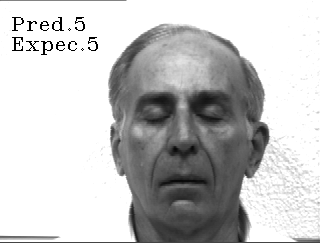

In [ ]:
# Exibindo as saídas previstas e esperadas para comparação
saida_esperada = int(caminho_imagem_teste.split(".")[0].split("/content/yalefaces/test/subject")[1])

cv2.putText(imagem_teste_np, 'Pred.' +str(previsao[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(imagem_teste_np, 'Expec.' +str(saida_esperada),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(imagem_teste_np)

7- Avaliação do classificador LBPH

In [ ]:
#Refaz 5-classificador LBPH: Treinamento, agora adicioando os parametros tentando melhora os resultados
#radius: Define o raio do círculo ao redor de cada pixel que será analisado
#neighbors: Este parâmetro determina quantos pontos (pixels vizinhos) serão amostrados no círculo definido pelo radius.
#grid_x e grid_y: Definem o número de células nas direções horizontal e vertical na grade da imagem

lbpg_classificador = cv2.face.LBPHFaceRecognizer_create(radius=4, neighbors=14,grid_x=9,grid_y=9)
lbpg_classificador.train(faces, ids)
lbpg_classificador.write('lbpg_classificador.yml')

In [ ]:
#Criaum um novo objeto de reconhecedor facial LBPH
lbpg_classificador_faces = cv2.face.LBPHFaceRecognizer_create()
#Carrega o classificador treinado no novo objeto
lbpg_classificador_faces.read('/content/lbpg_classificador.yml')

In [ ]:
#Testa o modelo com o conjunto de teste

#encontra o caminho completo de cada imagem da pasta de test
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]

#Inicia lista que guarda as previsões feitas pelo modelo
previsoes = []
#Inicia lista que guarda saidas esperadas do modelo
saidas_esperadas = []

for path in paths:

  #REALIZA O TESTE DE CADA IMAGEM COM O MODELO TREINADO
  #Carrega a imagem indicada pelo caminho de pach e converte para a escala de cinza
  imagem=Image.open(path).convert('L')
  #Converte do formato  PIL para o formato np array
  imagem_np = np.array(imagem, 'uint8')
  #Realiza o teste da imagem com o modelo treiando
  previsao, _ = lbpg_classificador_faces.predict(imagem_np)
  #Adiciona a previsão feita pelo modelo a lista guarda as previsões feitas pelo modelo
  previsoes.append(previsao)

  #ADICIONA A LISTA QUE GUARDA OS IDS DAS IAMGENS
  #Quebra a string do caminho da imagem na esquerda e na direita para isolar a saidas esperadas da imagem
  saida_esperada = path.split(".")[0].split("/content/yalefaces/test/subject")[1]
  #Converte a saidas esperadas da imagem do tipo string para o tipo int e adicionar ao final da lista de saidas_esperadas
  saidas_esperadas.append(int(saida_esperada))


In [ ]:
type(previsoes), type(saidas_esperadas)

(list, list)

In [ ]:
#Converte as saidas do formato list para np_array
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [ ]:
type(previsoes), type(saidas_esperadas)

(numpy.ndarray, numpy.ndarray)

In [ ]:
previsoes

array([14, 12,  4,  3,  8,  4,  7,  5, 11,  5,  7,  1, 12, 14,  6, 13, 12,
        4, 10,  7, 11,  4,  4,  3,  9,  4, 15, 14,  9, 13])

In [ ]:
saidas_esperadas

array([ 6,  2,  8,  3,  8,  2,  7,  5, 11,  5,  9,  1, 12, 14,  6, 13, 12,
        4, 10, 15, 11,  4,  1,  3,  7, 10, 15, 14,  9, 13])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

0.7

In [ ]:
#montando a matriz de convufão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

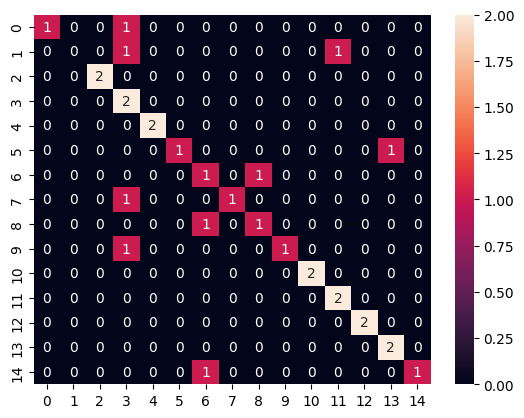

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

8-Utilizando a biblioteca DLIB para detecção de pontos faciais

In [12]:
#importa a biblioteca dlib
import dlib

In [13]:
#carrega o detector de faces e o detector de pontos de faces
detector_face = dlib.get_frontal_face_detector()
detector_pontos = dlib.shape_predictor('/content/drive/MyDrive/Cursos/Visão Computacional/Modelos/shape_predictor_68_face_landmarks.dat')

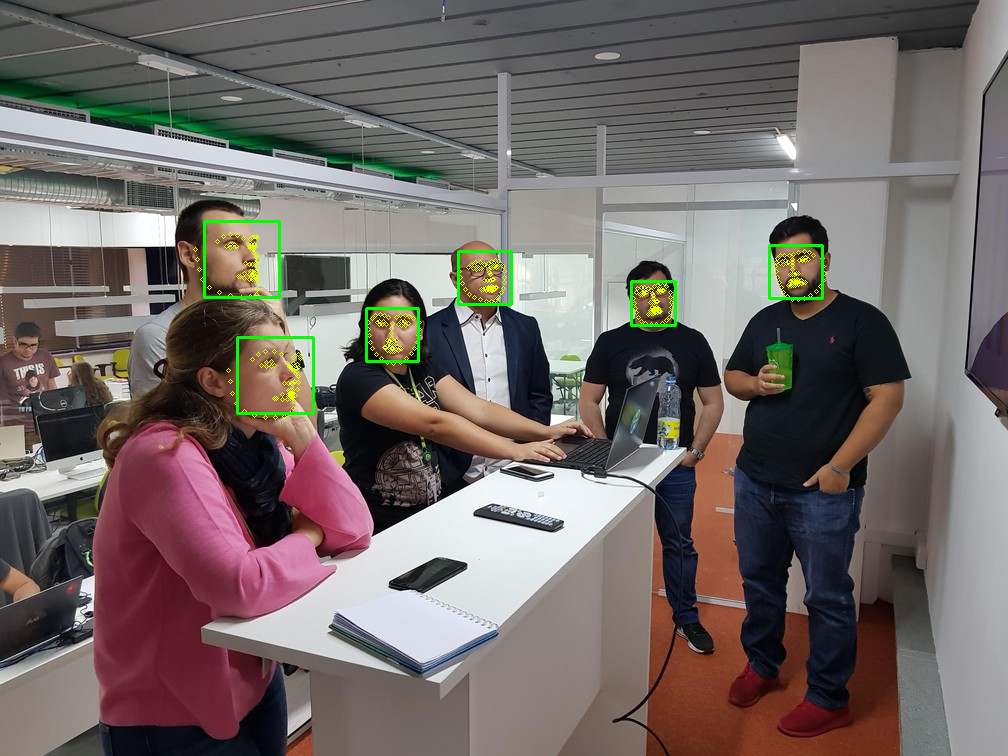

In [11]:

imagem = cv2.imread('/content/drive/MyDrive/Cursos/Visão Computacional/Imagens exemplos/ex2.jpeg')

#detecta as faces na imagem
faces = detector_face(imagem, 1)

for face in faces:

  # os pontos de cada face na imagem
  pontos = detector_pontos(imagem, face)

  #Desenha um circulo ao redor de cada ponto da face
  for ponto in pontos.parts():
    cv2.circle(imagem, (ponto.x, ponto.y), 2, (0,255,225), 1)

  #Desenha um retangulo ao redor das feces
  x, y, w, h = face.left(), face.top(), face.width(), face.height()
  cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(imagem)